# Data Cleaning and Exploratory Analysis of Cambridge Crime Data 2024

**Goals**: Clean up the data set for more easy manipulation and analysis. Find interesting trends that may help law enforcement focus or refine thier efforts in keeping this city safe.

The first step in doing this is to import all of the packages I will be using. I chose to import numpy and pandas as they are essential packages for data manipulation and analysis in python. Matplot and seaborn are just as essential for data visualization. Finally datetime is needed to more thouroughly manipulate the dates present in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


After importing all of the packages I will be using in this analysis, I now read in the data set as a dataframe named crime.

In [2]:
crime = pd.read_csv('Crime_Reports_20240701.csv', encoding = 'utf-8')
crime.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-01323,02/21/2009 09:53:00 AM,02/21/2009 09:20 - 09:30,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA"
1,2009-01324,02/21/2009 09:59:00 AM,02/20/2009 22:30 - 02/21/2009 10:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
2,2009-01327,02/21/2009 12:32:00 PM,02/19/2009 21:00 - 02/21/2009 12:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
3,2009-01331,02/21/2009 03:05:00 PM,02/21/2009 15:00 - 15:10,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA"
4,2009-01346,02/22/2009 05:02:00 AM,02/22/2009 05:02,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA"


Now that we have the data set in and have an idea of how the data is structured, lets dive further in and look at the Data types and null values.

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95923 entries, 0 to 95922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      95923 non-null  object 
 1   Date of Report   95923 non-null  object 
 2   Crime Date Time  95912 non-null  object 
 3   Crime            95923 non-null  object 
 4   Reporting Area   95915 non-null  float64
 5   Neighborhood     95915 non-null  object 
 6   Location         95628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.1+ MB


With 95923 total entries most seem to be non-null values which is good! However there still is some missing data in the 'Location', 'Crime Date Time', 'Reporting Area', and 'Neighborhood' columns that need to be cleaned up.

First lets clean up Location and 'Crime Date Time', since these columns are vital to determining the validity and details of the crimes the most prudent thing to do would be to eliminate entries that are missing these categories from the data set using the isnull function.

In [4]:
crime = crime[-(crime['Location'].isnull())]
crime = crime[-(crime['Crime Date Time'].isnull())]
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95618 entries, 0 to 95922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      95618 non-null  object 
 1   Date of Report   95618 non-null  object 
 2   Crime Date Time  95618 non-null  object 
 3   Crime            95618 non-null  object 
 4   Reporting Area   95612 non-null  float64
 5   Neighborhood     95612 non-null  object 
 6   Location         95618 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


Next are Neighborhood and Reporting Area. Since only a small portion of the data is missing is information, 6 out of 9518 entries, I decided to fill in the values with the averages of each column.

For Nieghborhood as a categorical variable I used the mode to fill in, while for Reporting area as a quantitative vaqriable I used the mean. Both were filled using fillna()

In [5]:
crime['Neighborhood'].fillna(crime['Neighborhood'].mode()[0], inplace= True)
crime['Reporting Area'].fillna(crime['Reporting Area'].mean(), inplace= True)
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95618 entries, 0 to 95922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      95618 non-null  object 
 1   Date of Report   95618 non-null  object 
 2   Crime Date Time  95618 non-null  object 
 3   Crime            95618 non-null  object 
 4   Reporting Area   95618 non-null  float64
 5   Neighborhood     95618 non-null  object 
 6   Location         95618 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


Now that the null values are taken care of I will move on to changing the data types of all date data into datetime objects.

This is simple for 'Date of Report' because the data is already formated correctly, however the 'Crime Date Time' data is not. To resolve this first I have to split the the start time of the crime from the end time using str.split. Then I fill in the crimes that don't have any values in the 'Crime End Date Time' column with copies of the crime's 'Crime Start Date Time' value.

In [6]:
crime['Date of Report'] = pd.to_datetime(crime['Date of Report'], format = 'mixed', dayfirst = True)
crime[['Crime Start Date Time', 'Crime End Date Time']] = crime['Crime Date Time'].str.split(' - ', expand = True)
crime['Crime End Date Time'].fillna(crime['Crime Start Date Time'], inplace= True)
crime.info()
crime.head()

<class 'pandas.core.frame.DataFrame'>
Index: 95618 entries, 0 to 95922
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   File Number            95618 non-null  object        
 1   Date of Report         95618 non-null  datetime64[ns]
 2   Crime Date Time        95618 non-null  object        
 3   Crime                  95618 non-null  object        
 4   Reporting Area         95618 non-null  float64       
 5   Neighborhood           95618 non-null  object        
 6   Location               95618 non-null  object        
 7   Crime Start Date Time  95618 non-null  object        
 8   Crime End Date Time    95618 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.3+ MB


,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Crime Start Date Time,Crime End Date Time
0,2009-01323,2009-02-21 09:53:00,02/21/2009 09:20 - 09:30,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA",02/21/2009 09:20,09:30
1,2009-01324,2009-02-21 09:59:00,02/20/2009 22:30 - 02/21/2009 10:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",02/20/2009 22:30,02/21/2009 10:00
2,2009-01327,2009-02-21 12:32:00,02/19/2009 21:00 - 02/21/2009 12:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",02/19/2009 21:00,02/21/2009 12:00
3,2009-01331,2009-02-21 15:05:00,02/21/2009 15:00 - 15:10,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA",02/21/2009 15:00,15:10
4,2009-01346,2009-02-22 05:02:00,02/22/2009 05:02,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA",02/22/2009 05:02,02/22/2009 05:02


However the 'Crime End Date Time' is still not formated correctly for all values. Some only have the time and no date as they ended on the same day they occured so to remedy this I added the dates from 'Crime Start Date Time' to the begining of 'Crime End Date Time' for all values where the length is less than 6 characters. 

In [7]:
crime['Crime End Date Time']= (crime['Crime Start Date Time'].str[:11] + crime['Crime End Date Time']).where\
(crime['Crime End Date Time'].str.len()<6, crime['Crime End Date Time'])
crime.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Crime Start Date Time,Crime End Date Time
0,2009-01323,2009-02-21 09:53:00,02/21/2009 09:20 - 09:30,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA",02/21/2009 09:20,02/21/2009 09:30
1,2009-01324,2009-02-21 09:59:00,02/20/2009 22:30 - 02/21/2009 10:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",02/20/2009 22:30,02/21/2009 10:00
2,2009-01327,2009-02-21 12:32:00,02/19/2009 21:00 - 02/21/2009 12:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",02/19/2009 21:00,02/21/2009 12:00
3,2009-01331,2009-02-21 15:05:00,02/21/2009 15:00 - 15:10,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA",02/21/2009 15:00,02/21/2009 15:10
4,2009-01346,2009-02-22 05:02:00,02/22/2009 05:02,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA",02/22/2009 05:02,02/22/2009 05:02


Finally I had the ability to change both 'Crime Start Date Time' and 'Crime End Date Time' into datetime objects. Once they were datetime objects I could easily split them into the crimes; start date, the start time, and the duration of the crime for readability.

In [8]:
crime['Crime Start Date Time'] = pd.to_datetime(crime['Crime Start Date Time'], format = 'mixed', dayfirst = True)
crime['Crime End Date Time'] = pd.to_datetime(crime['Crime End Date Time'], format = 'mixed', dayfirst = True)
crime['Crime Duration'] = crime['Crime Start Date Time']-crime['Crime End Date Time']
crime['Crime Date'] = pd.to_datetime(crime['Crime Start Date Time'].dt.date)
crime['Crime Time'] = crime['Crime Start Date Time'].dt.time
crime.drop(['Crime Date Time', 'Crime Start Date Time', 'Crime End Date Time'], axis = 1,inplace= True)
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95618 entries, 0 to 95922
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   File Number     95618 non-null  object         
 1   Date of Report  95618 non-null  datetime64[ns] 
 2   Crime           95618 non-null  object         
 3   Reporting Area  95618 non-null  float64        
 4   Neighborhood    95618 non-null  object         
 5   Location        95618 non-null  object         
 6   Crime Duration  95618 non-null  timedelta64[ns]
 7   Crime Date      95618 non-null  datetime64[ns] 
 8   Crime Time      95618 non-null  object         
dtypes: datetime64[ns](2), float64(1), object(5), timedelta64[ns](1)
memory usage: 7.3+ MB


Now that the data has been cleaned up I can start to visualize it. First I start with making a seaborn countplot to see what neihgborhoods hav eht highest crime rate.

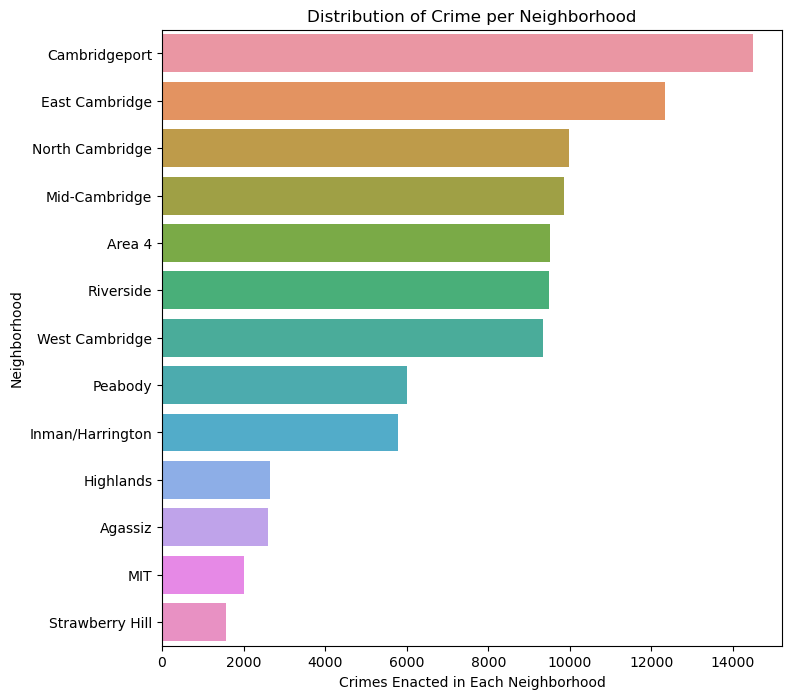

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(data = crime, y = crime['Neighborhood'], order = crime['Neighborhood'].value_counts().index)
plt.xlabel('Crimes Enacted in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.title('Distribution of Crime per Neighborhood')
plt.show()

Additionally I would like to take a look at the crime rate over time in the city, using the matplotlib plot function I set up a line plot for the crimes per day for the last 14 years starting at the first of 2010 to the first of 2024.

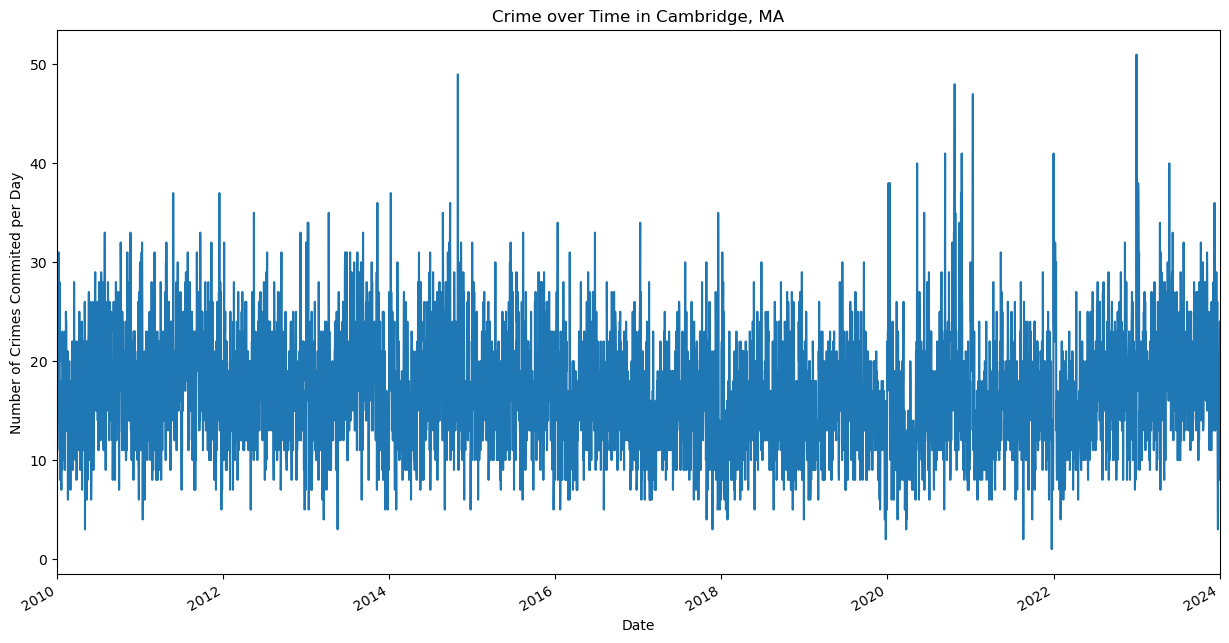

In [10]:
plt.figure(figsize=(15,8))
crime['Crime Date'].value_counts().plot()
plt.xlim(datetime.date(2010,1,1), datetime.date(2024,1,1))
plt.xlabel('Date')
plt.ylabel('Number of Crimes Commited per Day')
plt.title('Crime over Time in Cambridge, MA')
plt.show()

The crime rate seems pretty consistent but it is hard to tell looking at it on a day to dat basis and with all neighborhoods combine. Therefore I decided make a cross table of the data per neighborhood (crime_per) and using pandas PeriodIndex funciton took a look at crimes per year instead of crimes per day.

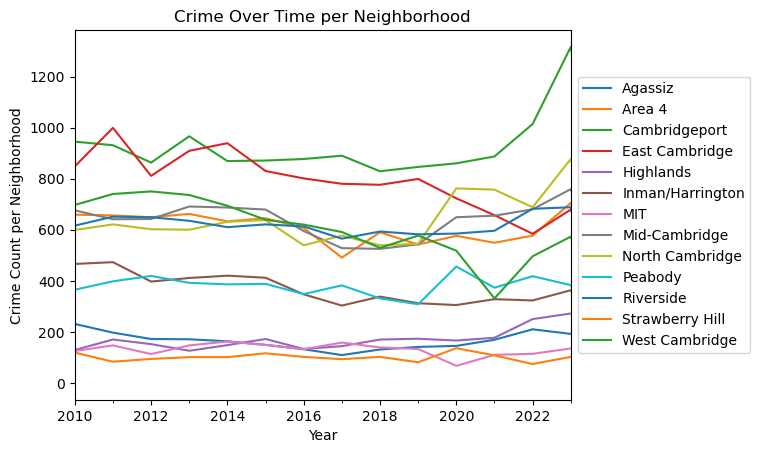

In [11]:
crime_per = pd.crosstab(pd.PeriodIndex(crime['Crime Date'], freq='Y'), crime['Neighborhood'])
crime_per.plot()
plt.xlim(datetime.date(2010,1,1), datetime.date(2023,12,31))
plt.legend(loc= 'center left', bbox_to_anchor = (1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Crime Count per Neighborhood')
plt.title('Crime Over Time per Neighborhood')
plt.show()


visualized this way it becomes apperent that Cambridgeport has a noticable increase in crime starting in 2021 and growing exponentialy from there. Other neighborhoods of concern are North Cambridge which also sees a noted but inconsistent rise starting in 2019 , and West Cambridge which actually sees a drop in crime in 2021 but a sharp rise from there. To make sure I'm not missing anything else I decided to split the neighborhoods into different charts to more easily read each line. I do so using a for loop of the dataframe crime_per's columns

<function matplotlib.pyplot.show(close=None, block=None)>

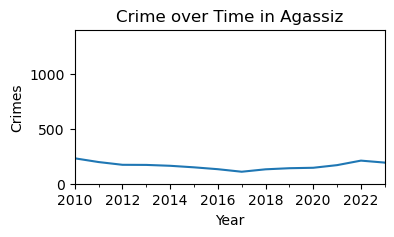

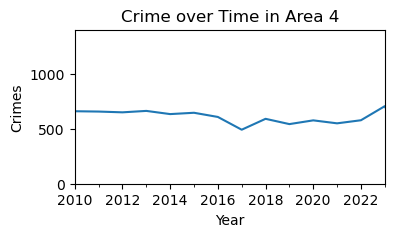

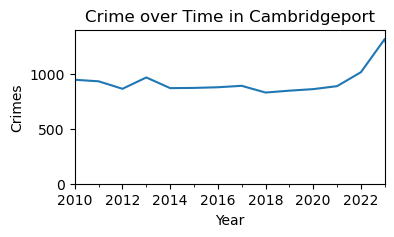

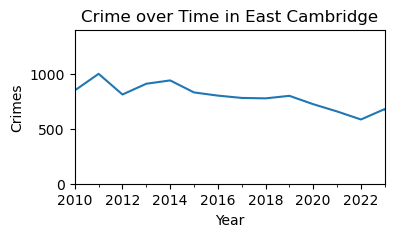

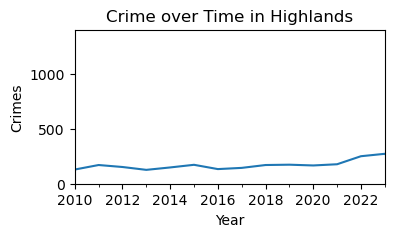

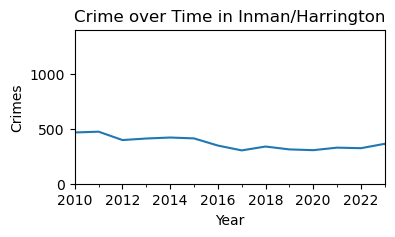

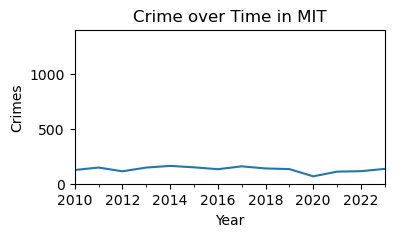

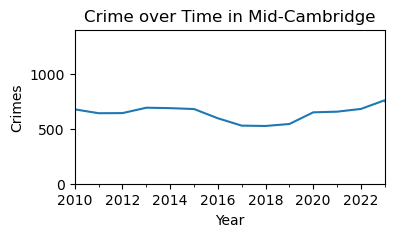

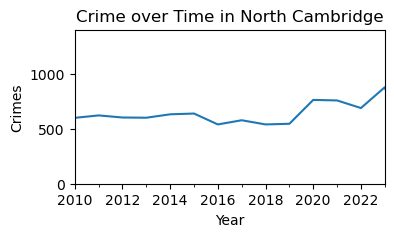

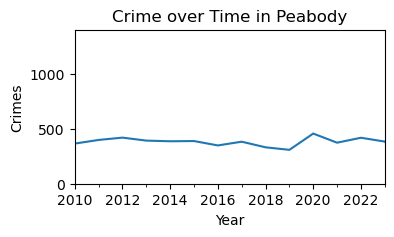

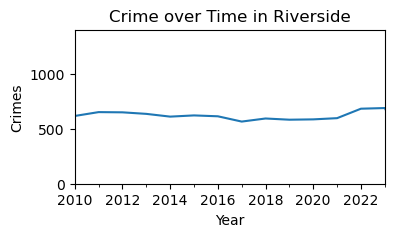

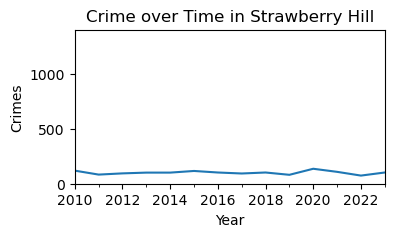

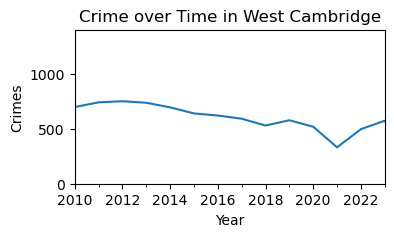

In [12]:

for n in crime_per.columns:
    plt.figure(figsize=(4,2))
    crime_per[n].plot()
    plt.xlim(datetime.date(2010,1,1), datetime.date(2023,12,31))
    plt.ylim(0,1400)
    plt.xlabel('Year')
    plt.ylabel('Crimes')
    plt.title('Crime over Time in ' + n)
plt.show

No other trends seem to be indentifiable even with the split. Therefore I decided to look further into this spike of crime within Cambridgeport. First off I charted the distributiuon of crime over the whole city of Cambridge.

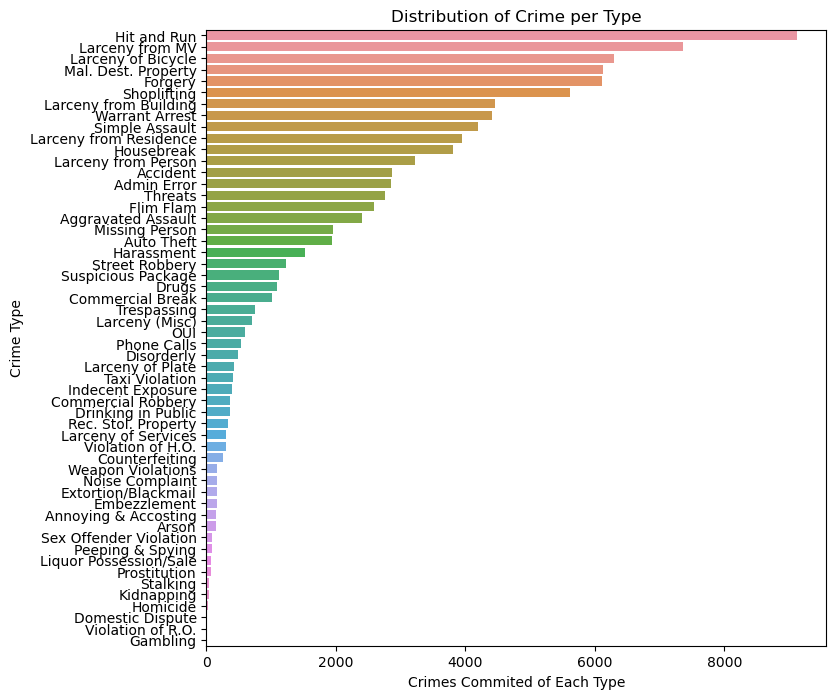

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(data = crime, y = crime['Crime'], order = crime['Crime'].value_counts().index)
plt.xlabel('Crimes Commited of Each Type')
plt.ylabel('Crime Type')
plt.title('Distribution of Crime per Type')
plt.show()

Then I took a look at what the crime distribution was for just the neighborhood of Cambridgeport and see how htat differed.

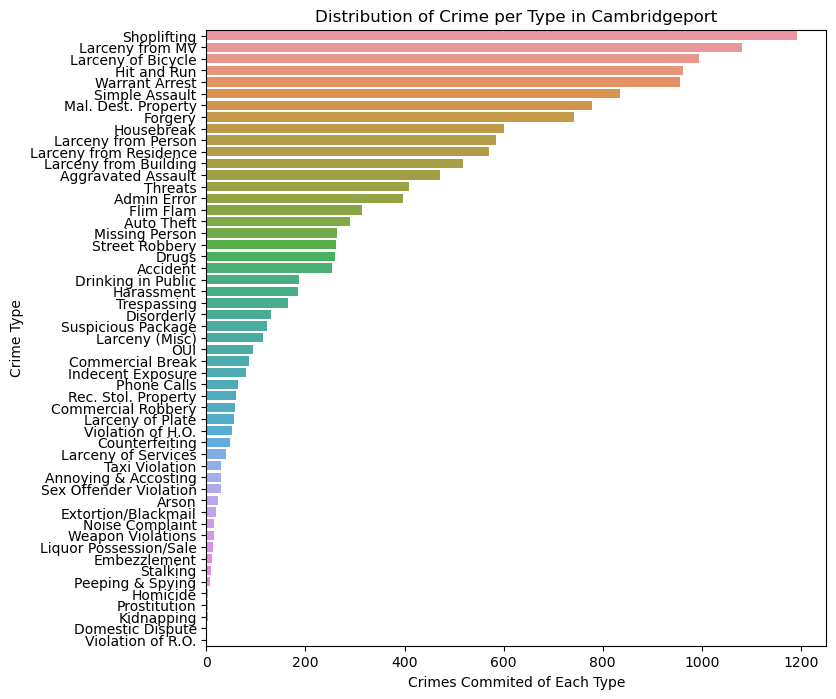

In [14]:

plt.figure(figsize=(8,8))
sns.countplot(data = crime, y = crime['Crime'][crime.Neighborhood=='Cambridgeport'], order = crime['Crime'][crime.Neighborhood== 'Cambridgeport'].value_counts().index)
plt.xlabel('Crimes Commited of Each Type')
plt.ylabel('Crime Type')
plt.title('Distribution of Crime per Type in Cambridgeport')
plt.show()

Wow! Looks like the most frequent crime in Cambridgeport is Shoplifting as opposed to Hit and Runs like the rest of the city. Now that I know there is this discrepency I want to look at how the rates of these crime, most importantly shoplifting, have changed over time in the neighborhood. First I have to make a cross table of the crimes in the neighbor hood witht he index being the year they were commited and the columns being the type of crime.

In [15]:
cambridgeport = pd.crosstab(pd.PeriodIndex(crime['Crime Date'][crime.Neighborhood=='Cambridgeport'], freq='Y'), crime['Crime'][crime.Neighborhood=='Cambridgeport'])
cambridgeport.head()

Crime,Accident,Admin Error,Aggravated Assault,Annoying & Accosting,Arson,Auto Theft,Commercial Break,Commercial Robbery,Counterfeiting,Disorderly,...,Stalking,Street Robbery,Suspicious Package,Taxi Violation,Threats,Trespassing,Violation of H.O.,Violation of R.O.,Warrant Arrest,Weapon Violations
row_0,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then I use that cross table to plot the incedents of the top 10 crimes in Cambridgeport over the last 14 years.

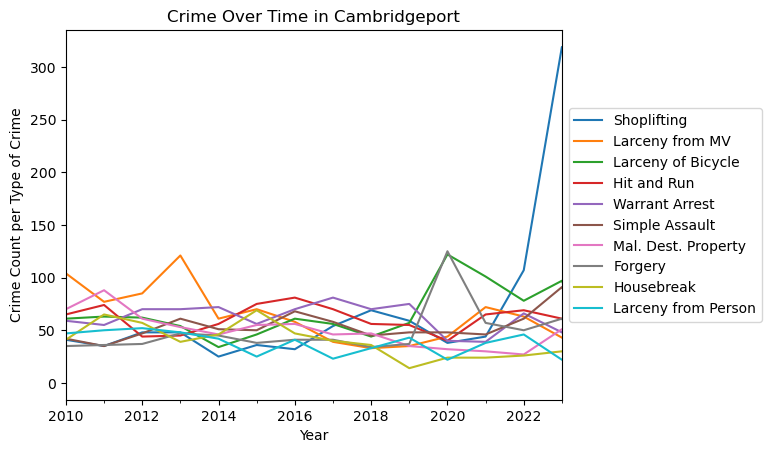

row_0
2000      0
2001      0
2004      0
2005      0
2007      0
2008      1
2009     59
2010     41
2011     35
2012     48
2013     48
2014     25
2015     36
2016     32
2017     54
2018     69
2019     59
2020     38
2021     44
2022    107
2023    319
2024    177
Freq: A-DEC, Name: Shoplifting, dtype: int64


In [16]:
cambridgeport[crime['Crime'][crime.Neighborhood== 'Cambridgeport'].value_counts().index[0:10]].plot()
plt.xlim(datetime.date(2010,1,1), datetime.date(2023,12,31))
plt.legend(loc= 'center left', bbox_to_anchor = (1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Crime Count per Type of Crime')
plt.title('Crime Over Time in Cambridgeport')
plt.show()
print(cambridgeport['Shoplifting'])

And my suspicions are confirmed. The sharp rise in crime in the neighborhood of Cambridgeport is due to a massive increase in the amount of shoplifting crimes commited year over year.

**Conclusions**: Though crime has remained relatively consistent in the city of Cambridge over since 2010, that is not the case for every neighborhood in the city. Recently, since 2021, the nieghborhood of Cambridgeport has seen an epidemic of shoplifting as incedents have gone from 44 in 2021 to 319 in 2023, and the trends seems to hold for 2024 as they are already up to 177 cases as of July 5th. Law enforcement and outreach efforts should be focused ontrying to combat and prevent shoplifting in this neighborhood and greater awareness of the problem should be communicated to businesses in the area.